# Track Classifier Testing

In [1]:
import numpy as np
import pandas as pd
import torch
import os
import os.path as osp
import glob
import importlib

In [2]:
import qc_model
import qc_model_trainer
import qc_dataprep
importlib.reload(qc_model)
importlib.reload(qc_model_trainer)
importlib.reload(qc_dataprep)


<module 'qc_dataprep' from '/home/jkimmel/src/musc_tracker/qc_dataprep.py'>

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
data_dir = '/media/jkimmel/Laysan/20180417_musc_aging_tl/track_qc_models/data/'
tp = qc_dataprep.TrackParser(data_dir, 'WellB02*xy0*densenet*tracks*.csv', 'WellB02*xy0*densenet*tracks*_pruned.csv')
# load pruning csv
prune_fov = np.loadtxt('/media/jkimmel/Laysan/20180417_musc_aging_tl/WellB02_Seq0120/prune_fov.csv', delimiter=',')
print(prune_fov[3,:])

Concatenating tracks & clipping length to 131 time steps.
[ 111. -111. -111. -111. -111. -111. -111. -111. -111. -111. -111. -111.
 -111. -111. -111. -111. -111. -111. -111. -111. -111. -111. -111. -111.
 -111. -111. -111. -111. -111. -111.]


/home/jkimmel/src/musc_tracker/qc_dataprep.py:102: UserWarning: loadtxt: Empty input file: "/media/jkimmel/Laysan/20180417_musc_aging_tl/track_qc_models/data/WellB02_Seq0120_xy00_densenet_md75_gf10_tracksX.csv"
  x = np.loadtxt(self.all_tracksX[i], delimiter=',')
/home/jkimmel/src/musc_tracker/qc_dataprep.py:103: UserWarning: loadtxt: Empty input file: "/media/jkimmel/Laysan/20180417_musc_aging_tl/track_qc_models/data/WellB02_Seq0120_xy00_densenet_md75_gf10_tracksY.csv"
  y = np.loadtxt(self.all_tracksY[i], delimiter=',')


In [18]:
importlib.reload(qc_dataprep)
ds = qc_dataprep.TrackDataset(tp.tracks, tp.labels, track_origins=tp.all_tracks_origins, center_tracks=True, transform=qc_dataprep.RandomNoise(sigma=1.))

Track dataset with 35 tracks and labels.


In [19]:
sample = ds[27]
print(sample['input'].size())
print(sample['features'].size())

print(sample['input'][:20,0])
print(sample['features'])
print(sample['track_origin'])

torch.Size([131, 2])
torch.Size([15])
tensor([ 0.0000,  0.6855,  4.2690,  1.8578,  1.4497,  0.5864,  1.0364,  0.2451,
        -2.0543,  0.7513,  0.4451, -1.2649, -0.8407, -2.8800, -1.0697, -2.6621,
        -2.1397,  0.9873, -1.4004, -2.0221])
tensor([1.3130e+03, 3.4588e+02, 5.6580e+01, 2.6669e+00, 2.0347e+00, 1.3908e+01,
        5.2149e+00, 7.7330e-01, 1.1379e+00, 1.4644e+00, 1.9171e+00, 2.3994e+00,
        2.7517e+00, 3.1157e+00, 3.6571e+00])
6


In [7]:
importlib.reload(qc_dataprep)

img_dir = '/media/jkimmel/Laysan/20180417_musc_aging_tl/WellB02_Seq0120/'
img_glob = '*xy0*t059*c1.tif'

tids = qc_dataprep.TrackImageDataset(track_ds=ds,
                                    img_dir=img_dir,
                                    img_glob=img_glob,
                                    bbox_sz=(128,128),
                                    im_transform=qc_dataprep.imgnet_trans)

print(np.where(ds.labels.numpy()==0))

(array([ 0, 16, 17, 23, 29, 34]),)


5
/media/jkimmel/Laysan/20180417_musc_aging_tl/WellB02_Seq0120/WellB02_Seq0120xy05t059c1.tif
(3, 224, 224)


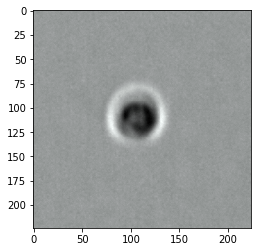

In [8]:
sample = tids[25]
print(sample['track_origin'])
print(tids.img_files[sample['track_origin']])
image = sample['image'].squeeze().numpy()
print(image.shape)
image = image.transpose(1,2,0)
plt.imshow(image/image.max())

# Attempt Heuristic of semi-Heuristic Classification

In [37]:
importlib.reload(qc_dataprep)
data_dir = '/media/jkimmel/Laysan/20180417_musc_aging_tl/track_qc_models/data/'
tp = qc_dataprep.TrackParser(data_dir, '*densenet*tracks*.csv', '*densenet*tracks*_pruned.csv')
ds = qc_dataprep.TrackDataset(tp.tracks, 
                              tp.labels, 
                              track_origins=tp.all_tracks_origins, 
                              center_tracks=True, 
                              transform=qc_dataprep.RandomNoise(sigma=1.))

/home/jkimmel/src/musc_tracker/qc_dataprep.py:102: UserWarning: loadtxt: Empty input file: "/media/jkimmel/Laysan/20180417_musc_aging_tl/track_qc_models/data/WellB02_Seq0120_xy00_densenet_md75_gf10_tracksX.csv"
  x = np.loadtxt(self.all_tracksX[i], delimiter=',')
/home/jkimmel/src/musc_tracker/qc_dataprep.py:103: UserWarning: loadtxt: Empty input file: "/media/jkimmel/Laysan/20180417_musc_aging_tl/track_qc_models/data/WellB02_Seq0120_xy00_densenet_md75_gf10_tracksY.csv"
  y = np.loadtxt(self.all_tracksY[i], delimiter=',')
/home/jkimmel/src/musc_tracker/qc_dataprep.py:102: UserWarning: loadtxt: Empty input file: "/media/jkimmel/Laysan/20180417_musc_aging_tl/track_qc_models/data/WellB02_Seq0120_xy16_densenet_md75_gf10_tracksX.csv"
  x = np.loadtxt(self.all_tracksX[i], delimiter=',')
/home/jkimmel/src/musc_tracker/qc_dataprep.py:103: UserWarning: loadtxt: Empty input file: "/media/jkimmel/Laysan/20180417_musc_aging_tl/track_qc_models/data/WellB02_Seq0120_xy16_densenet_md75_gf10_tracksY.cs

Concatenating tracks & clipping length to 131 time steps.
Track dataset with 1993 tracks and labels.


In [38]:
X = []
for i in range(len(ds)):
    s = ds[i]
    X.append(s['features'].unsqueeze(0))
X = torch.cat(X, dim=0)
X = X.numpy()
print('Feature matrix has %d samples and %d features.' % X.shape)

Feature matrix has 1993 samples and 17 features.


In [39]:
import pandas as pd
features = ['start_x', 'start_y', 'net_dist', 'total_dist', 'mean_disp', 'var_disp', 'min_disp', 'max_disp', 'maxvmean_disp']
prcs = ['p' + str(i).zfill(2) for i in np.arange(10,90,10)]
features += prcs
print(len(features), features)
df = pd.DataFrame(X)
df.columns = features
df['class'] = tp.labels.numpy()

17 ['start_x', 'start_y', 'net_dist', 'total_dist', 'mean_disp', 'var_disp', 'min_disp', 'max_disp', 'maxvmean_disp', 'p10', 'p20', 'p30', 'p40', 'p50', 'p60', 'p70', 'p80']


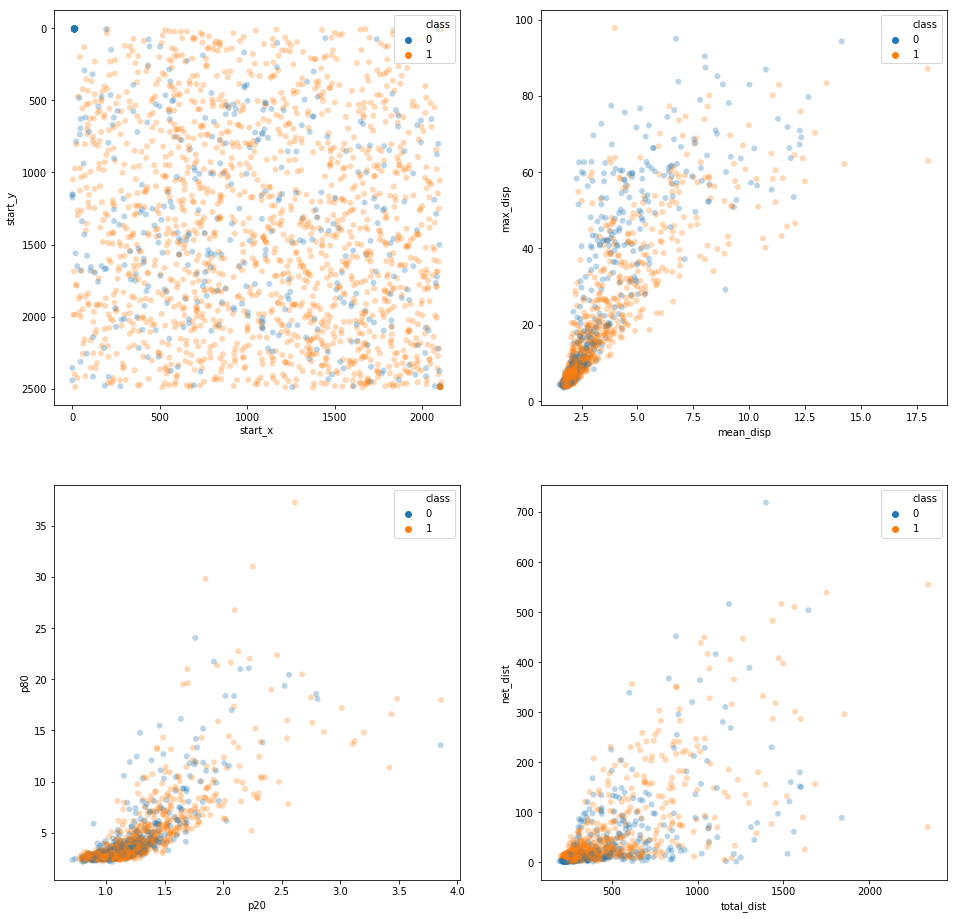

In [42]:
import seaborn as sns
fig, ax = plt.subplots(2,2,figsize=(16,16))
sns.scatterplot(data=df, x='start_x', y='start_y', hue='class', 
                ax=ax[0,0], 
                linewidth=0, alpha=0.3)
ax[0,0].invert_yaxis()
sns.scatterplot(data=df, x='mean_disp', y='max_disp', hue='class', 
                ax=ax[0,1], 
                linewidth=0, alpha=0.3)
sns.scatterplot(data=df, x='p20', y='p80', hue='class', 
                ax=ax[1,0], 
                linewidth=0, alpha=0.3)
sns.scatterplot(data=df, x='total_dist', y='net_dist', hue='class', 
                ax=ax[1,1], 
                linewidth=0, alpha=0.3)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators = 100)
y = np.array(df['class'])

Xs = StandardScaler().fit_transform(X)

scores = cross_val_score(clf, Xs, y, cv=5)
print('Scores')
print(scores)
print(scores.mean())
print('Baseline clf: ', np.sum(y)/len(y))

Scores
[0.8320802  0.84962406 0.84210526 0.84924623 0.78140704]
0.8308925580282365
Baseline clf:  0.7616658304064224


### Results

In [24]:
out_path = '/media/jkimmel/Dove/20180216_aging_lrc_tl/track_qc_models/trained'

df = pd.read_csv(os.path.join(out_path, 'rf_cv_performance.csv'), index_col=0)

bl = pd.DataFrame({'Fold':1, 'Accuracy':df.iloc[0,:]['Baseline_accuracy'], 'False_positive': df.iloc[0,:]['Baseline_false_positive'], 'Model': 'Baseline'}, index=[5])
df = df.iloc[:,:3]
df['Model'] = 'RF'

df = pd.concat([df, bl], axis=0)
df.loc[:, 'Model'] = pd.Categorical(df['Model'], categories=['Baseline', 'RF'])

In [13]:
import matplotlib
matplotlib.rcParams.update({'font.size':16})

/home/jkimmel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


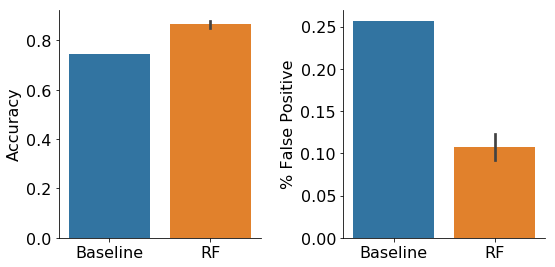

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(data=df, x='Model', y='Accuracy', ax=ax[0])
ax[0].set_xlabel('')
sns.barplot(data=df, x='Model', y='False_positive', ax=ax[1])
ax[1].set_ylabel('% False Positive')
ax[1].set_xlabel('')
sns.despine()
plt.tight_layout()
plt.savefig('images/rf_qc_model_perf.png', dpi=300)